In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
df = pd.read_csv('ET_steam.csv')
df.head(5)

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,app_id,title,date_release,rating,positive_ratio,user_reviews,price_original,discount,os
0,0,158405309,76561198386493444,banger ost,2024-02-16 06:37:04,2024-02-16 06:37:04,True,7,0,0.608349,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w
1,1,158511191,76561198863061889,The Good:\n\nSountracks in this game absolutel...,2024-02-17 16:05:22,2024-02-17 16:05:22,True,6,0,0.592803,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w
2,2,159766660,76561198984533374,Relived my childhood! One can play this game 1...,2024-03-03 20:25:18,2024-03-03 20:25:18,True,5,0,0.561698,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w
3,3,159360393,76561198328052404,This game's standout platforming elements are ...,2024-02-27 08:58:55,2024-02-27 08:58:55,False,4,1,0.538689,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w
4,4,158872020,76561198083872400,He's literally me before literally me existed,2024-02-21 15:22:46,2024-02-21 15:22:46,True,4,0,0.526532,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w


In [3]:
df.shape

(422682, 19)

In [4]:
df.dtypes

Unnamed: 0               int64
recommendationid         int64
author                   int64
review                  object
timestamp_created       object
timestamp_updated       object
voted_up                  bool
votes_up                 int64
votes_funny              int64
weighted_vote_score    float64
app_id                   int64
title                   object
date_release            object
rating                  object
positive_ratio           int64
user_reviews             int64
price_original         float64
discount               float64
os                      object
dtype: object

In [5]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'])
df['date_release'] = pd.to_datetime(df['date_release'])

In [6]:
df.describe()

,Unnamed: 0,recommendationid,author,timestamp_created,timestamp_updated,votes_up,votes_funny,weighted_vote_score,app_id,date_release,positive_ratio,user_reviews,price_original,discount
count,422682.000000,4.226820e+05,4.226820e+05,422682,422682,422682.000000,4.226820e+05,422682.000000,4.226820e+05,422682,422682.000000,4.226820e+05,422682.000000,422682.000000
mean,211340.500000,8.300898e+07,7.656120e+16,2020-06-01 14:04:40.072919808,2020-06-25 02:04:10.404308736,10.405934,6.096915e+04,0.463176,9.245276e+05,2018-08-07 16:41:42.170426368,75.909215,3.095247e+03,9.276014,5.773056
min,0.000000,5.340000e+02,7.656120e+16,2010-11-20 01:15:28,2010-11-20 01:15:28,0.000000,0.000000e+00,0.000000,1.000000e+01,1997-06-30 00:00:00,0.000000,1.000000e+01,0.000000,0.000000
25%,105670.250000,4.065738e+07,7.656120e+16,2018-03-08 23:41:54.249999872,2018-04-14 20:07:06,1.000000,0.000000e+00,0.464372,4.403400e+05,2016-08-02 00:00:00,65.000000,2.200000e+01,2.990000,0.000000
50%,211340.500000,7.915323e+07,7.656120e+16,2020-11-12 23:18:22.500000,2020-12-04 07:01:50.500000,3.000000,0.000000e+00,0.523810,8.043500e+05,2018-10-03 00:00:00,80.000000,4.700000e+01,5.990000,0.000000
75%,317010.750000,1.234554e+08,7.656120e+16,2022-10-07 04:36:45.500000,2022-10-27 08:21:15.500000,8.000000,1.000000e+00,0.576069,1.330630e+06,2021-02-16 00:00:00,90.000000,1.350000e+02,11.990000,0.000000
max,422681.000000,1.605885e+08,7.656120e+16,2024-03-15 22:37:14,2024-03-15 22:37:14,15609.000000,4.294967e+09,0.990941,2.599300e+06,2023-10-24 00:00:00,100.000000,7.494460e+06,299.990000,90.000000
std,122017.927578,4.717897e+07,3.587229e+08,NaN,NaN,50.060308,1.618177e+07,0.224964,5.739879e+05,NaN,18.571552,5.992711e+04,10.698429,18.985003


In [7]:
#check for duplicate values
number_of_duplicaes = df.duplicated().sum()
print('number of duplicated rows is {}'.format(number_of_duplicaes) )

number of duplicated rows is 0


In [9]:
# check for missing data
# the whole dataset: find out the percentgae of values missing
total_missing_percentage = df.isnull().sum() * 100 / len(df)
total_missing_percentage

Unnamed: 0             0.000000
recommendationid       0.000000
author                 0.000000
review                 0.045897
timestamp_created      0.000000
timestamp_updated      0.000000
voted_up               0.000000
votes_up               0.000000
votes_funny            0.000000
weighted_vote_score    0.000000
app_id                 0.000000
title                  0.000000
date_release           0.000000
rating                 0.000000
positive_ratio         0.000000
user_reviews           0.000000
price_original         0.000000
discount               0.000000
os                     1.313754
dtype: float64

In [10]:
df.loc[df.review.isna()]

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,app_id,title,date_release,rating,positive_ratio,user_reviews,price_original,discount,os
4878,4878,156699091,76561198313069485,NaN,2024-01-24 21:14:52,2024-01-24 21:14:52,True,0,0,0.000000,1425130,Forgotten Hill First Steps,2021-06-10,Very Positive,96,78,2.99,0.0,wm
4929,4929,157927711,76561198313069485,NaN,2024-02-09 22:52:24,2024-02-09 22:52:24,True,0,0,0.000000,1926170,Forgotten Hill Tales,2022-04-27,Positive,88,45,2.99,0.0,wm
5833,5833,139499965,76561199124506991,NaN,2023-06-04 04:10:21,2023-06-04 04:10:21,True,0,0,0.000000,2233890,Prison Wars,2023-01-06,Positive,92,14,1.99,0.0,w
8675,8675,106992280,76561198002178416,NaN,2022-01-01 00:09:06,2022-01-01 00:09:06,True,0,0,0.469214,437690,Venture Kid,2018-05-03,Very Positive,84,135,9.99,0.0,w
12784,12784,147435197,76561198860180717,NaN,2023-10-01 21:40:38,2023-10-01 21:40:38,True,0,0,0.000000,1584690,TrinityS,2022-04-27,Very Positive,82,98,14.99,0.0,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412589,412589,160248325,76561199588255621,NaN,2024-03-10 17:29:18,2024-03-10 17:29:18,True,1,0,0.523810,1594940,Little Witch in the Woods,2022-05-16,Very Positive,91,5470,15.99,0.0,wm
415659,415659,141172607,76561198110729074,NaN,2023-07-03 06:46:01,2023-07-03 06:46:01,True,2,0,0.473407,1515020,Kingsblood,2023-06-21,Positive,100,19,14.99,0.0,wl
417615,417615,137852992,76561198096538664,NaN,2023-05-06 07:32:08,2023-05-06 07:32:08,True,1,1,0.451128,2346890,Bananaguy,2023-05-05,Positive,100,12,3.99,30.0,w
419552,419552,155547032,76561199209470740,NaN,2024-01-08 19:09:09,2024-03-04 19:37:58,True,0,0,0.000000,393330,Typing Instructor for Kids Platinum 5,2016-01-26,Positive,80,10,3.99,35.0,w


In [13]:
#fill na values with ''
df = df.fillna('')

**EDA**

In [18]:
print(f'number of users commented: {df.author.nunique()}')

number of users commented: 268872


In [19]:
print(f'number of games in comments: {df.app_id.nunique()}')

number of games in comments: 43931


In [23]:
cat_col = ['rating', 'os']
for col in cat_col:
    print(df[col].value_counts())
    print('\n')

rating
Positive                   112766
Mixed                      109995
Very Positive               96483
Mostly Positive             75149
Mostly Negative             16822
Overwhelmingly Positive      7695
Negative                     2849
Very Negative                 882
Overwhelmingly Negative        41
Name: count, dtype: int64


os
w      286223
wml     71528
wm      47156
wl      12201
         5553
l          20
ml          1
Name: count, dtype: int64




should we combine the ratings? 

for os: should we create 3 columns w, m, l and use boolean varaiable?

In [24]:
df.columns

Index(['Unnamed: 0', 'recommendationid', 'author', 'review',
       'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up',
       'votes_funny', 'weighted_vote_score', 'app_id', 'title', 'date_release',
       'rating', 'positive_ratio', 'user_reviews', 'price_original',
       'discount', 'os'],
      dtype='object')

In [32]:
df['time_between_comment_and_game'] = df['timestamp_created'] - df['date_release']
df['days_between_comment_and_game'] = df['time_between_comment_and_game'].dt.days
df

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,title,date_release,rating,positive_ratio,user_reviews,price_original,discount,os,time_between_comment_and_game,days_between_comment_and_game
0,0,158405309,76561198386493444,banger ost,2024-02-16 06:37:04,2024-02-16 06:37:04,True,7,0,0.608349,...,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w,5565 days 06:37:04,5565
1,1,158511191,76561198863061889,The Good:\n\nSountracks in this game absolutel...,2024-02-17 16:05:22,2024-02-17 16:05:22,True,6,0,0.592803,...,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w,5566 days 16:05:22,5566
2,2,159766660,76561198984533374,Relived my childhood! One can play this game 1...,2024-03-03 20:25:18,2024-03-03 20:25:18,True,5,0,0.561698,...,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w,5581 days 20:25:18,5581
3,3,159360393,76561198328052404,This game's standout platforming elements are ...,2024-02-27 08:58:55,2024-02-27 08:58:55,False,4,1,0.538689,...,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w,5576 days 08:58:55,5576
4,4,158872020,76561198083872400,He's literally me before literally me existed,2024-02-21 15:22:46,2024-02-21 15:22:46,True,4,0,0.526532,...,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,w,5570 days 15:22:46,5570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422677,422677,156941025,76561198157392394,Lovecraftian FPS sequel game good. Better than...,2024-01-27 19:18:41,2024-01-27 19:18:41,True,2,0,0.512195,...,Forgive Me Father 2,2023-10-19,Very Positive,95,82,0.00,0.0,w,100 days 19:18:41,100
422678,422678,157149584,76561198413366286,"This is a big step up from the original, but d...",2024-01-30 06:36:33,2024-01-30 06:36:33,True,1,0,0.500000,...,Forgive Me Father 2,2023-10-19,Very Positive,95,82,0.00,0.0,w,103 days 06:36:33,103
422679,422679,159446977,76561197999394473,A fantastic base of a game that is sorely miss...,2024-02-28 12:21:26,2024-02-28 12:21:26,False,3,0,0.565881,...,FatalZone,2023-10-23,Very Positive,88,144,0.00,0.0,w,128 days 12:21:26,128
422680,422680,160071442,76561197971053601,"Game play loop is fun, but it kind of stinks t...",2024-03-08 08:53:45,2024-03-08 08:53:45,True,1,0,0.516484,...,FatalZone,2023-10-23,Very Positive,88,144,0.00,0.0,w,137 days 08:53:45,137


In [43]:
rating_to_num_dict = {'Mixed': 0, 'Mostly Positive': 1, 'Positive': 2, 'Very Positive' : 3, 'Overwhelmingly Positive': 4, 
               'Mostly Negative': -1, 'Negative': -2, 'Very Negative' : -3, 'Overwhelmingly Negative': -4}
rating_simplify_dict = {'Mixed': 'Mixed', 'Mostly Positive': 'Positive', 'Positive': 'Positive', 'Very Positive' : 'Positive', 'Overwhelmingly Positive': 'Positive', 
               'Mostly Negative': 'Negative', 'Negative': 'Negative', 'Very Negative' : 'Negative', 'Overwhelmingly Negative': 'Negative'}
df['rating_numerical'] = df['rating'].map(rating_to_num_dict)
df['rating_simplified'] = df['rating'].map(rating_simplify_dict)

In [40]:
numerical_col = ['voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score', 'positive_ratio', 'user_reviews', 'price_original', 'discount', 'days_between_comment_and_game', 'rating_numerical']

<Axes: >

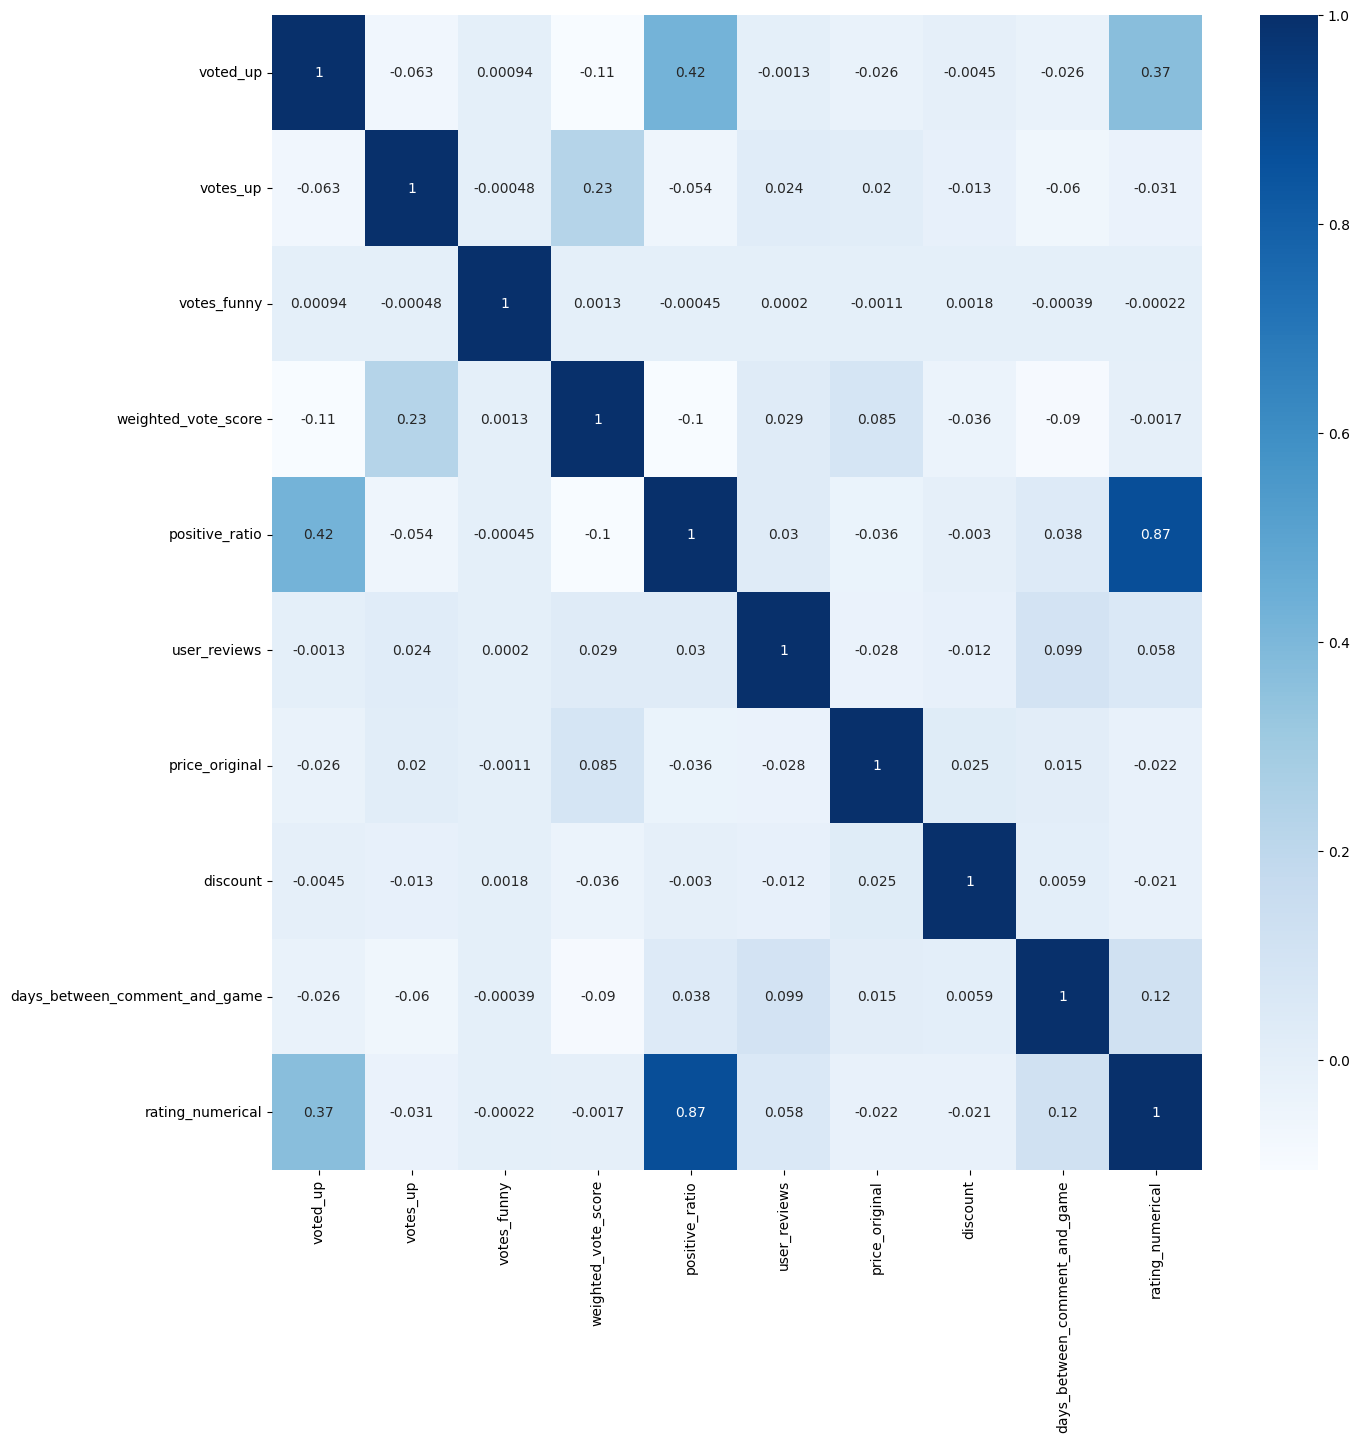

In [41]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data=df[numerical_col].corr(), cmap='Blues', ax = ax, fmt='.2g', annot = True)

Text(0.5, 1.0, 'Distribution of rating by os')

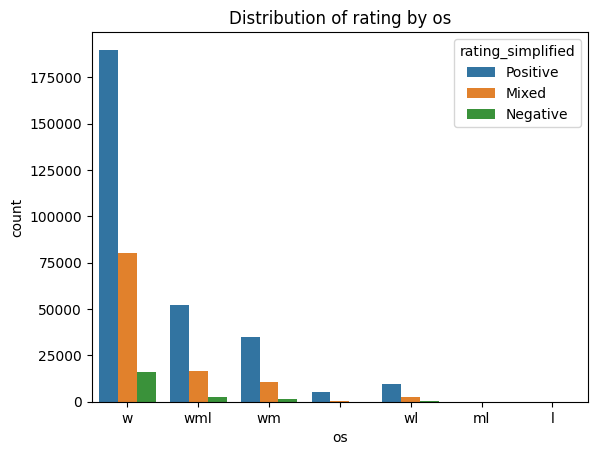

In [45]:
sns.countplot(x='os', data=df, hue='rating_simplified') 
plt.title('Distribution of rating by os')

should we delete the part for ml and l?

seems like windows is a major source for negative ratings 

**simple recommendation model**

1. content-based